# Gradient Boosting

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

# Data Integration

In [17]:
# sorting data & predictors
db = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
db.drop_duplicates(inplace = True)

In [18]:
db = db[db["Diabetes_012"] != 1] # drop prediabetes
db['Diabetes_012'] = db['Diabetes_012'].replace(2,1)

i_keep_0 = db[db['Diabetes_012'] == 0].sample(n = db['Diabetes_012'].value_counts()[1],
                                   replace=False,
                                   random_state = 1).index

i_keep_all = db[db['Diabetes_012'] == 1].index.append(i_keep_0).sort_values()

db = db.loc[i_keep_all].reset_index(drop=True)

In [19]:
# subsetting predictors
db_main = db[['Diabetes_012', 'BMI', 'HighBP', 'HighChol', 'Sex', 'Age']]

# Model Building

In [20]:
x = db_main.drop('Diabetes_012', axis = 1)

scaler = MinMaxScaler(feature_range = (0, 1))
xresc = scaler.fit_transform(x)
x = pd.DataFrame(data = xresc, columns = x.columns)

y = db_main['Diabetes_012']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [21]:
gb_clf = GradientBoostingClassifier(n_estimators = 120, learning_rate = 0.22, 
                                    max_depth = 3, random_state = 1)
gb_clf.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.22, n_estimators=120, random_state=1)

In [22]:
pred = gb_clf.predict(xtest)

In [23]:
print(f'Training MSE: {round(mean_squared_error(gb_clf.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

Training MSE: 0.2849
Testing MSE: 0.2868


In [24]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     0.7497    0.6574    0.7005      3581
    Diabetes     0.6838    0.7714    0.7250      3439

    accuracy                         0.7132      7020
   macro avg     0.7167    0.7144    0.7127      7020
weighted avg     0.7174    0.7132    0.7125      7020



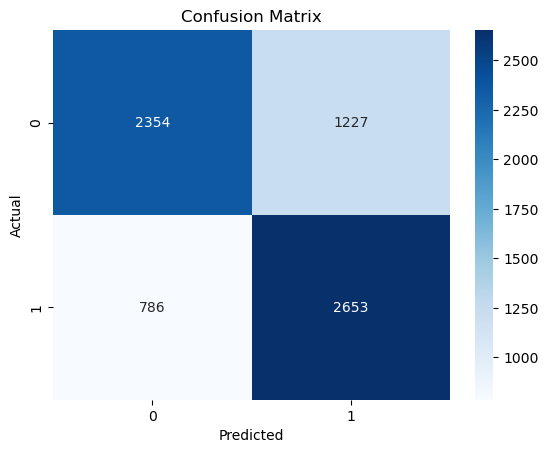

In [25]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()